Pymaceuticals Analysis
From the data we can see that two drugs immediately stand out by going off of average tumor volume (assuming a similar starting volume for all of the treatments).  Capomulin and Ramicane can potential show the greatest promise in the upfront analysis.  In addition to the smallest mean tumor volume, we can see that the two drug regimens are the most researched as well, containing the first and second most amount of data point of any other drug in the set.  Another small inference we can make, is that the study seems to be evenly split between male (50.6%) and female (49.4%).  This is good for research as it eliminates uncertainties when you are able to take out a possible factor that may contribute to something like tumor size/treatment effectiveness.  In this case we may be able to infer that gender might not play a role as the total population is evenly split.  However, this would require more analysis along gender correlations to confirm.  Additionally, it looks as though the data is pretty reliable.  Using a box plot to examine the possibility of any outliers, we observe that none of the data point fall outside of the outlier range calculated using the IQR.  

In [ ]:
#%matplotlib notebook

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)


In [2]:
# Combine the data into a single dataset
# We want to merge outer on the Mouse ID so that we don't lose any data
combined_datasets = pd.merge(mouse_metadata_df, study_results_df, how = "outer", on = "Mouse ID")
combined_datasets.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
combined_datasets.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
#It looks like the counts across all columns are the same and we do not need to do a dropna()
drugs = combined_datasets["Drug Regimen"].unique()
drugs_df = pd.DataFrame({"Drug Names":drugs})
drugs_df

,Drug Names
0,Ramicane
1,Capomulin
2,Infubinol
3,Placebo
4,Ceftamin
5,Stelasyn
6,Zoniferol
7,Ketapril
8,Propriva
9,Naftisol


In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen.
grouped_by_drug = combined_datasets.groupby(["Drug Regimen"])

grouped_mean = round(grouped_by_drug["Tumor Volume (mm3)"].mean(), 3)
grouped_median = round(grouped_by_drug["Tumor Volume (mm3)"].median(), 3)
grouped_var= round(grouped_by_drug["Tumor Volume (mm3)"].var(), 3)
grouped_std = round(grouped_by_drug["Tumor Volume (mm3)"].std(), 3)
grouped_sem = round(grouped_by_drug["Tumor Volume (mm3)"].sem(), 3)

grouped_by_drug_df = pd.DataFrame({"Tumor Volume Mean":grouped_mean, "Tumor Volume Median":grouped_median,
                                  "Tumor Volume Variance":grouped_var, "Tumor Volume Standard Deviation":grouped_std,
                                  "Tumor Volume SEM":grouped_sem})
grouped_by_drug_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


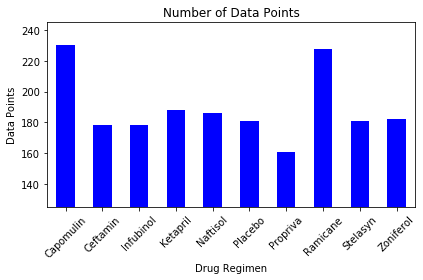

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas DataFrame.plot()
grouped_count = grouped_by_drug["Tumor Volume (mm3)"].count()
drug_df_bar = pd.DataFrame({"Number of Data Points":grouped_count})

pandas_bar = drug_df_bar.plot.bar(rot = 45, color = "blue", legend = False)
pandas_bar.set_ylim(125,245)
plt.ylabel("Data Points")
plt.title("Number of Data Points")
plt.tight_layout()

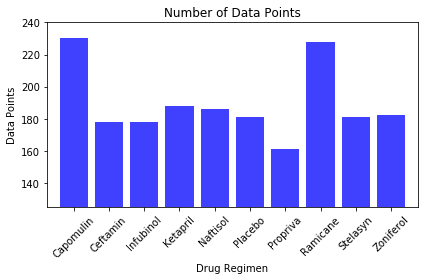

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(0, len(grouped_by_drug))
drug_name_list = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane",
                 "Stelasyn", "Zoniferol"]
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.xlim(-0.75, len(grouped_by_drug)-.25)
plt.ylim(125, max(grouped_count) + 10)

plt.bar(x_axis, grouped_count, facecolor="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, drug_name_list, rotation = 45)
plt.tight_layout()
plt.show()

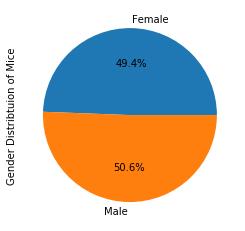

,Gender Distribution
Sex,
Female,935
Male,958


<Figure size 432x288 with 0 Axes>

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_by_gender = combined_datasets.groupby(["Sex"])
gender_count = grouped_by_gender.count()
gender_count_pick = gender_count["Mouse ID"]
gender_count_df = pd.DataFrame({"Gender Distribution":gender_count_pick})
gender_pie = gender_count_df.plot(kind = "pie", y = "Gender Distribution", legend = False, autopct='%1.1f%%')
gender_pie.set_ylabel("Gender Distribtuion of Mice")
plt.show()
plt.tight_layout()
gender_count_df

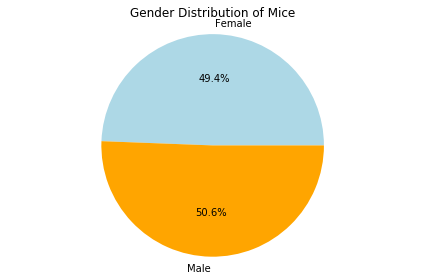

,Gender Distribution
Sex,
Female,935
Male,958


In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_type = ["Female", "Male"]
colors = ["lightblue", "orange"]
explode = (0, 0)
plt.title("Gender Distribution of Mice")
plt.pie(gender_count_pick, explode=explode, labels=gender_type, colors=colors,
        autopct="%1.1f%%")
plt.axis("equal")
plt.tight_layout()
plt.show()
gender_count_df

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Capomulin, Ramicane, Infubinol, and Ceftamin 
# Calculate the IQR and quantitatively determine if there are any potential outliers.

final_tumor_volumes = combined_datasets.groupby(["Drug Regimen", "Timepoint"]).mean()["Tumor Volume (mm3)"]
final_tumor_volumes = pd.DataFrame(final_tumor_volumes)
final_tumor_capomulin = final_tumor_volumes.loc[["Capomulin"], ["Tumor Volume (mm3)"]]
final_tumor_capomulin_df = final_tumor_capomulin["Tumor Volume (mm3)"]

quartiles = final_tumor_capomulin_df.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for capomulin is: {lowerq}")
print(f"The upper quartile of tumor volume for capomulin is: {upperq}")
print(f"The interquartile range of tumor volume for capomulin is: {iqr}")
print(f"The the median of tumor volume for capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
final_tumor_capomulin_df

The lower quartile of tumor volume for capomulin is: 38.05496398386364
The upper quartile of tumor volume for capomulin is: 42.829297273062494
The interquartile range of tumor volume for capomulin is: 4.774333289198857
The the median of tumor volume for capomulin is: 40.327926574278656 
Values below 30.89346405006535 could be outliers.
Values above 49.990797206860776 could be outliers.


Drug Regimen  Timepoint
Capomulin     0            45.000000
              5            44.266086
              10           43.084291
              15           42.064317
              20           40.716325
              25           39.939528
              30           38.769339
              35           37.816839
              40           36.958001
              45           36.236114
Name: Tumor Volume (mm3), dtype: float64

In [11]:
final_tumor_ramicane = final_tumor_volumes.loc[["Ramicane"], ["Tumor Volume (mm3)"]]
final_tumor_ramicane_df = final_tumor_ramicane["Tumor Volume (mm3)"]

quartiles = final_tumor_ramicane_df.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for ramicane is: {lowerq}")
print(f"The upper quartile of tumor volume for ramicane is: {upperq}")
print(f"The interquartile range of tumor for ramicane volume is: {iqr}")
print(f"The the median of tumor volume for ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
final_tumor_ramicane_df

The lower quartile of tumor volume for ramicane is: 37.7647815928882
The upper quartile of tumor volume for ramicane is: 42.27273320177083
The interquartile range of tumor for ramicane volume is: 4.507951608882635
The the median of tumor volume for ramicane is: 39.606312209347834 
Values below 31.002854179564245 could be outliers.
Values above 49.034660615094786 could be outliers.


Drug Regimen  Timepoint
Ramicane      0            45.000000
              5            43.944859
              10           42.531957
              15           41.495061
              20           40.238325
              25           38.974300
              30           38.703137
              35           37.451996
              40           36.574081
              45           34.955595
Name: Tumor Volume (mm3), dtype: float64

In [12]:
final_tumor_infubinol = final_tumor_volumes.loc[["Infubinol"], ["Tumor Volume (mm3)"]]
final_tumor_infubinol_df = final_tumor_infubinol["Tumor Volume (mm3)"]

quartiles = final_tumor_infubinol_df.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for infubinol is: {lowerq}")
print(f"The upper quartile of tumor volume for infubinol is: {upperq}")
print(f"The interquartile range of tumor volume for infubinol is: {iqr}")
print(f"The the median of tumor volume for infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
final_tumor_infubinol_df

The lower quartile of tumor volume for infubinol is: 49.87703056726191
The upper quartile of tumor volume for infubinol is: 60.13169522172794
The interquartile range of tumor volume for infubinol is: 10.254664654466026
The the median of tumor volume for infubinol is: 54.456471648611114 
Values below 34.49503358556287 could be outliers.
Values above 75.51369220342698 could be outliers.


Drug Regimen  Timepoint
Infubinol     0            45.000000
              5            46.541247
              10           49.403909
              15           51.296397
              20           53.197691
              25           55.715252
              30           58.299397
              35           60.742461
              40           63.162824
              45           65.755562
Name: Tumor Volume (mm3), dtype: float64

In [13]:
final_tumor_ceftamin = final_tumor_volumes.loc[["Ceftamin"], ["Tumor Volume (mm3)"]]
final_tumor_ceftamin_df = final_tumor_ceftamin["Tumor Volume (mm3)"]

quartiles = final_tumor_ceftamin_df.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume for ceftamin is: {lowerq}")
print(f"The upper quartile of tumor volume for ceftamin is: {upperq}")
print(f"The interquartile range of tumor volume for ceftamin is: {iqr}")
print(f"The the median of tumor volume for ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
final_tumor_ceftamin_df

The lower quartile of tumor volume for ceftamin is: 48.73735763542105
The upper quartile of tumor volume for ceftamin is: 58.313040172321436
The interquartile range of tumor volume for ceftamin is: 9.575682536900388
The the median of tumor volume for ceftamin is: 53.22236128111111 
Values below 34.37383383007047 could be outliers.
Values above 72.67656397767202 could be outliers.


Drug Regimen  Timepoint
Ceftamin      0            45.000000
              5            46.503051
              10           48.285125
              15           50.094055
              20           52.157049
              25           54.287674
              30           56.769517
              35           58.827548
              40           61.467895
              45           64.132421
Name: Tumor Volume (mm3), dtype: float64

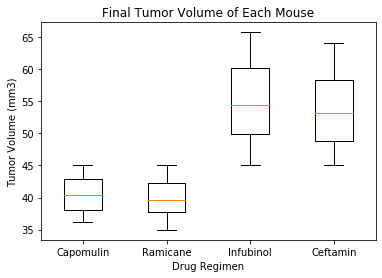

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_data = [final_tumor_capomulin_df, final_tumor_ramicane_df, final_tumor_infubinol_df, final_tumor_ceftamin_df]

fig1, ax1 = plt.subplots()
outlier_format = dict(markerfacecolor='r', marker='D')
ax1.set_title("Final Tumor Volume of Each Mouse")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(box_data, flierprops = outlier_format)
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()

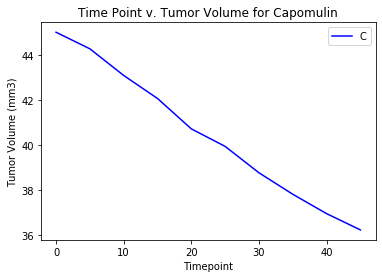

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
timepoint_values = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
tumor_size_time = [45.000000, 44.266086, 43.084291, 42.064317, 40.716325, 39.939528, 
                  38.769339, 37.816839, 36.958001, 36.236114]
plt.plot(timepoint_values, tumor_size_time, color="blue")
plt.title("Time Point v. Tumor Volume for Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend("Capomulin")
plt.show()

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_v_tumor = combined_datasets.groupby(["Drug Regimen", "Weight (g)"]).mean()["Tumor Volume (mm3)"]
weight_v_tumor_df = pd.DataFrame(weight_v_tumor)
weight_v_tumor_df
weight_list = weight_v_tumor_df.iloc[:,1]
tumor_vol_list = weight_v_tumor_df.iloc[:,2]

plt.scatter(weight_list, tumor_vol_list, 
            marker="o", facecolors="blue", edgecolors="black")
plt.ylim(5,75)
plt.xlim(5,75)
plt.title("Weight of Mouse v. Avg Tumor Volume")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

#code doesn't work.

IndexError: single positional indexer is out-of-bounds

In [17]:
# Calculate the correlation coefficient and 
# linear regression model for mouse weight and average tumor volume for the Capomulin regimen

tumor_slope, tumor_int, tumor_r, tumor_p, tumor_std_err = st.linregress(weight_list, tumor_vol_list)
tumor_fit = tumor_slope * weight_list + tumor_int
weight_list = weight_v_tumor_df.iloc[:,1]
tumor_vol_list = weight_v_tumor_df.iloc[:,2]
plt.scatter(weight_list, tumor_vol_list)
plt.plot(weight_list, tumor_fit,"--")
plt.xticks(weight_list, rotation=90)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

#code doesn't work.

NameError: name 'weight_list' is not defined